Primeras filas del dataset:


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Datos luego del preprocesamiento:


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,ESTU_PRIVADO_LIBERTAD,RENDIMIENTO_GLOBAL,coef_1,coef_2,...,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEAUTOMOVIL_Desconocido,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENELAVADORA_Desconocido,FAMI_TIENELAVADORA_No,FAMI_TIENELAVADORA_Si,ESTU_PAGOMATRICULAPROPIO_Desconocido,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,904256,20212,300,4,4,4,0,2,0.322,0.208,...,True,False,False,True,False,False,True,False,True,False
1,645256,20212,249,3,2,0,0,1,0.311,0.215,...,True,False,True,False,False,False,True,False,True,False
2,308367,20203,819,4,2,5,0,1,0.297,0.214,...,False,False,True,False,False,False,True,False,True,False
3,470353,20195,14,26,3,0,0,0,0.485,0.172,...,True,False,True,False,False,False,True,False,True,False
4,989032,20212,907,1,2,3,0,3,0.316,0.232,...,True,False,False,True,False,False,True,False,True,False


<ipython-input-6-f3953aae33e4>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='RENDIMIENTO_GLOBAL', data=df, palette='viridis')


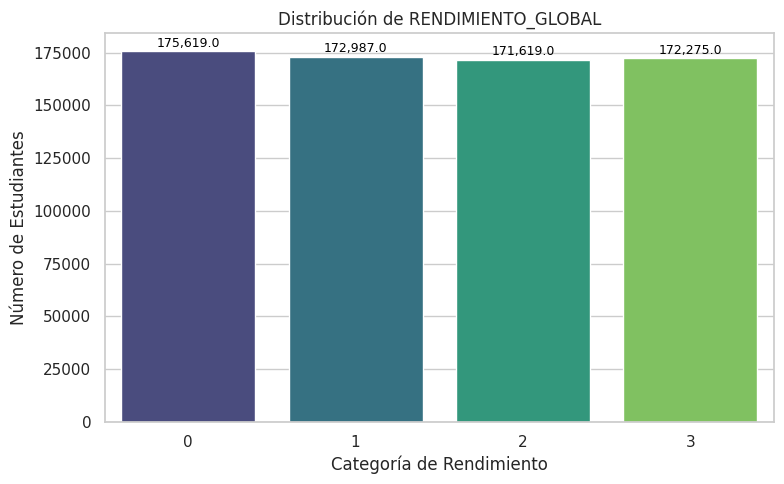

In [6]:
# 02 - preprocesado.ipynb

# Paso 1: Carga de datos
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
file_path = "train.csv"  # Cambiar esta ruta si se usa local o en Drive

df = pd.read_csv(file_path)
print("Primeras filas del dataset:")
display(df.head())

# Paso 2: Limpieza de datos
# Eliminamos columnas duplicadas
if 'FAMI_TIENEINTERNET.1' in df.columns:
    df = df.drop(columns=['FAMI_TIENEINTERNET.1'])

# Imputamos valores faltantes en variables categóricas con "Desconocido"
cat_columns = df.select_dtypes(include='object').columns
for col in cat_columns:
    df[col] = df[col].fillna('Desconocido')

# Paso 3: Codificación de variables categóricas
# Aplicamos One-Hot Encoding a variables socioeconómicas con pocas categorías

# Verificamos qué columnas sí existen en el DataFrame
low_cardinality_cols = [
    'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
    'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA', 'ESTU_PAGOMATRICULAPROPIO',
]

# Filtramos solo las que están en df
low_cardinality_cols = [col for col in low_cardinality_cols if col in df.columns]

# Aplicamos One-Hot Encoding a las columnas válidas
df = pd.get_dummies(df, columns=low_cardinality_cols)


# Aplicamos LabelEncoder solo a las variables categóricas restantes
cat_columns = df.select_dtypes(include='object').columns
label_encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Datos luego del preprocesamiento:")
display(df.head())

# Paso 4: Visualización de la variable objetivo
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='RENDIMIENTO_GLOBAL', data=df, palette='viridis')
plt.title('Distribución de RENDIMIENTO_GLOBAL')
plt.xlabel('Categoría de Rendimiento')
plt.ylabel('Número de Estudiantes')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 6),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Comentario Final:
# El dataset fue limpiado e imputado. Las variables socioeconómicas con pocas categorías
# fueron codificadas con One-Hot Encoding. El resto se transformó con Label Encoding para evitar
# que el dataset crezca demasiado. Con esto el dataset está listo para la siguiente fase: entrenamiento del modelo.
